<a href="https://colab.research.google.com/github/amd257/COVID-detection-using-CNNs/blob/main/SequentialModel_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Compressed Dataset file is stored at: https://www.dropbox.com/s/960snngb5e4wlld/DatasetBinaryClassification.zip?dl=0

!wget https://www.dropbox.com/s/960snngb5e4wlld/DatasetBinaryClassification.zip?dl=0

--2021-02-24 21:22:45--  https://www.dropbox.com/s/960snngb5e4wlld/DatasetBinaryClassification.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/960snngb5e4wlld/DatasetBinaryClassification.zip [following]
--2021-02-24 21:22:45--  https://www.dropbox.com/s/raw/960snngb5e4wlld/DatasetBinaryClassification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc83c88cf473c6a2322b6883ab29.dl.dropboxusercontent.com/cd/0/inline/BJnzFDp1SSfeZklcQz_yXtDrMATjJn2Q9LMhqttAp0jaIdGGdim_nycAWWSfX8VnHu5sR_pfE10ID9tVcIB4QtDZ-KSAnlisnFgTOTt3eYvIKbJXLdiT5SF-T1IRfW3bxgE/file# [following]
--2021-02-24 21:22:46--  https://uc83c88cf473c6a2322b6883ab29.dl.dropboxusercontent.com/cd/0/inline/BJnzFDp1SSfeZklcQz_yXtDrMATjJn2Q9LMhqttAp0jaIdGGd

In [3]:
#Extracting the compressed dataset
!unzip /content/DatasetBinaryClassification.zip?dl=0

Archive:  /content/DatasetBinaryClassification.zip?dl=0
   creating: DatasetBinaryClassification/
   creating: DatasetBinaryClassification/Test/
   creating: DatasetBinaryClassification/Test/COVID/
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1014).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1033).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1051).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1056).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1064).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1067).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1075).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1089).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (110).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1103).png  
  inflating: DatasetBinaryClassification/Test/COVID/COVID (1116).png  
  inflating: DatasetBi

In [16]:
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [9]:
train_images_path = "DatasetBinaryClassification/Train"
validation_images_path = "DatasetBinaryClassification/Validation"
test_images_path = "DatasetBinaryClassification/Test"

In [10]:
#Training data augmentation before feeding it to the CNN model
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    )

#Preprocessing the training data
train_generator= train_datagen.flow_from_directory(
    train_images_path,
    target_size = (256,256),
    batch_size = 60,
    class_mode = "binary",
    shuffle = True,
    seed =40
    )

train_generator.class_indices

Found 2034 images belonging to 2 classes.


{'COVID': 0, 'Non-COVID': 1}

In [12]:
validation_dataset = image.ImageDataGenerator(rescale = 1./255) #Rescaling the validation images 

#Preprocessing the validation dataset
validation_generator = validation_dataset.flow_from_directory(
    validation_images_path,
    target_size = (256,256),
    batch_size = 10,
    class_mode = "binary",
    shuffle = True,
    seed =40
    )

validation_generator.class_indices

Found 254 images belonging to 2 classes.


{'COVID': 0, 'Non-COVID': 1}

In [20]:
#CNN Based Model using Keras(Sequential Model)
#Multiple layers with different number of filters
#Layered architecture with 4 Convolutional Layers
model = Sequential()

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape =(256,256,3)
                 )) #224 is standard size, imagenet models are also trained on this size

model.add(Conv2D(64,
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) #to prevent overfitting

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(128,
                 kernel_size = (3,3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5)) #changed dropout value from 0.25 to 0.5 to further prevent overfitting

model.add(Dense(1,activation='sigmoid')) 
# output labels are [0,3), so 3 is used
#sigmoid function convert the data into probabilities for each class


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #configure the learning process

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 62, 62, 64)       

(None, 256, 256, 3)


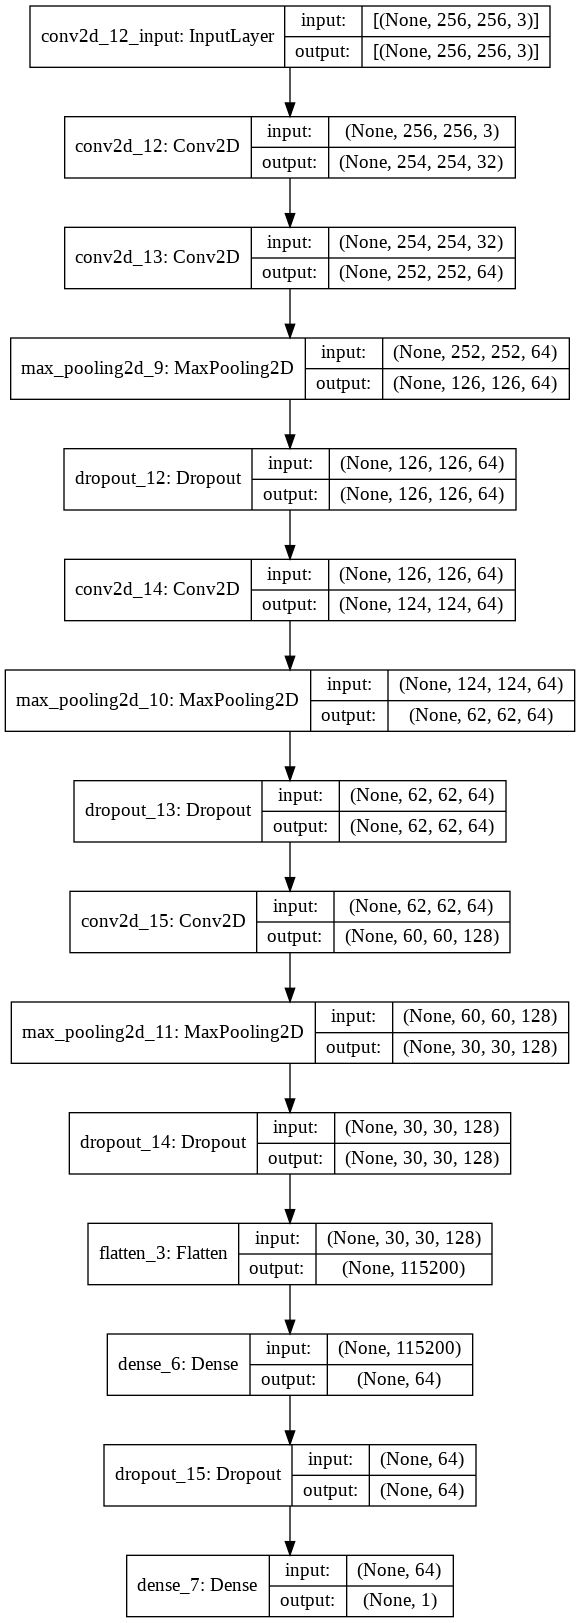

In [21]:
print(model.input.shape)
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [22]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

33
25


In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN, 
    epochs=25,
    validation_data = validation_generator,
    validation_steps = STEP_SIZE_VALID
    )

Epoch 1/25
33/33 [==============================] - 54s 1s/step - loss: 1.2891 - accuracy: 0.5705 - val_loss: 0.3156 - val_accuracy: 0.9360
Epoch 2/25
33/33 [==============================] - 45s 1s/step - loss: 0.3802 - accuracy: 0.8120 - val_loss: 0.2649 - val_accuracy: 0.9520
Epoch 3/25
33/33 [==============================] - 45s 1s/step - loss: 0.3481 - accuracy: 0.8116 - val_loss: 0.1658 - val_accuracy: 0.9600
Epoch 4/25
33/33 [==============================] - 45s 1s/step - loss: 0.2569 - accuracy: 0.8815 - val_loss: 0.1823 - val_accuracy: 0.9480
Epoch 5/25
33/33 [==============================] - 45s 1s/step - loss: 0.2390 - accuracy: 0.9223 - val_loss: 0.1462 - val_accuracy: 0.9520
Epoch 6/25
33/33 [==============================] - 45s 1s/step - loss: 0.2497 - accuracy: 0.9297 - val_loss: 0.1583 - val_accuracy: 0.9520
Epoch 7/25
33/33 [==============================] - 45s 1s/step - loss: 0.2122 - accuracy: 0.9250 - val_loss: 0.1364 - val_accuracy: 0.9520
Epoch 8/25
33/33 [==

In [24]:
model.save('Seq_Model_Binary.h5')

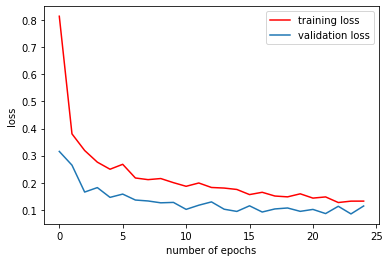

In [25]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

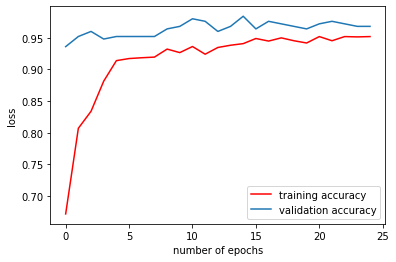

In [26]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()